Fit simple models predicting female behavior from surrogate neural activity.

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_lin_single

cc = np.concatenate

NTR = 276
NTRAIN = int(round(.8*NTR))
NSPLIT = 30

In [10]:
# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln'  # lin-nonlinear neural model
NRL_MDL = 'dyn'  # dynamical neural model

TARG = 'FFV'
# TARG = 'FLS'
# TARG = 'FRS'

DF_BAKER_FIT_PARAM = pd.read_csv(f'data/simple/neur/baker_{NRL_MDL}_fit_param.csv') 
PFX_BEHAV = f'data/simple/mlv/neur_basic/baker_{NRL_MDL}/mlv_baker_{NRL_MDL}'
SAVE_FILE = f'data/simple/mlv/neur_basic/baker_single_{NRL_MDL}_{TARG.lower()}_{NTR}_tr.npy'

In [3]:
DF_BAKER_FIT_PARAM

,EXPT_ID,LINE,FLY,ROI,ROI_USED,FIT_ERR,SUCCESS,IDUR_H,T_0,R_0,...,IT_H_P_75,IT_H_P_76,IT_H_P_77,IT_H_P_78,IT_H_P_79,IT_H_P_80,IT_H_P_81,IT_H_P_82,IT_H_P_83,IT_H_P_84
0,0,R70G01,0,somas,False,0.808941,True,85,0.235294,-0.006447,...,0.405079,-0.153919,-0.084005,-0.023031,-0.500732,0.248644,0.123110,0.363151,1.119452,0.429223
1,1,R70G01,1,somas,False,0.457488,True,85,0.235294,-0.000504,...,-0.053841,-0.817662,0.467766,-0.317737,0.584080,0.277029,-0.154241,0.885123,0.432522,-0.694030
2,2,R70G01,2,somas,False,0.775661,True,85,0.235294,0.003064,...,0.828576,-0.357376,0.261292,0.135865,-0.650183,0.507268,-0.435252,0.951922,1.226774,-0.263039
3,3,R70G01,3,somas,False,0.739510,True,85,-0.000000,-0.001410,...,-0.168137,-2.539934,1.934715,1.123649,-1.900755,1.060162,-0.556732,-0.412909,-1.551010,0.274843
4,4,R70G01,4,somas,False,0.679988,True,85,0.235294,0.002908,...,0.485656,-0.532152,-0.412399,-0.144568,-0.330449,-0.016173,0.054561,0.393820,0.537209,0.629661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,VT34811,0,somas,False,0.319561,True,85,-0.470588,0.000621,...,-1.803515,-1.660505,2.266607,-0.607034,-0.539491,1.374014,2.304586,-1.413805,-0.404226,-1.419691
220,220,VT34811,0,ascending projection,False,0.077990,True,85,-0.705882,0.000186,...,0.017594,-0.014267,0.051192,-0.068066,-0.028610,-0.072570,0.049909,0.018111,-0.111210,0.024049
221,221,vPN1_split,0,somas,False,0.746045,True,85,-0.941176,-0.008519,...,-1.387801,-0.100230,2.083877,-1.238546,-0.668647,2.468639,0.445609,-0.484847,3.136567,-0.002074
222,222,vPN1_split,1,somas,False,1.406564,True,85,-0.705882,-0.010054,...,-5.945394,9.582893,3.379880,-7.513656,4.297579,4.452005,-5.416048,-4.413230,12.146565,-2.883794


In [ ]:
R_COLS_ALL = [f'R_{ir}' for ir in DF_BAKER_FIT_PARAM.EXPT_ID]

r2s_train = np.nan * np.zeros((NSPLIT, len(R_COLS_ALL)))
r2s_test = np.nan * np.zeros((NSPLIT, len(R_COLS_ALL)))

for csplit in range(NSPLIT):
    sys.stdout.write(f'Split {csplit}')
    np.random.seed(csplit)
    rnd_tr_idxs = np.random.permutation(NTR)
    idxs_train = rnd_tr_idxs[:NTRAIN]
    idxs_test = rnd_tr_idxs[NTRAIN:]
    rgr = skl_fit_lin_single(PFX_BEHAV, R_COLS_ALL, TARG, idxs_train, idxs_test, progress=True)
    r2s_train[csplit, :] = rgr.r2_train
    r2s_test[csplit, :] = rgr.r2_test
    sys.stdout.write('\n')

In [ ]:
# save r2, weights, and example predictions
save_data = {
    'r2s_train': r2s_train,
    'r2s_test': r2s_test,
    'ntr': NTR,
    'nsplit': NSPLIT,
}

np.save(SAVE_FILE, np.array([save_data]))

Max train R2: 0.017076491375305296
Max test R2: 0.012012819039995652


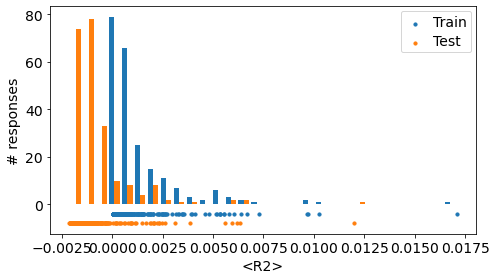

In [11]:
data = np.load(SAVE_FILE, allow_pickle=True)[0]
r2_train_means = data['r2s_train'].mean(axis=0)
r2_test_means = data['r2s_test'].mean(axis=0)


fig, ax = plt.subplots(1, 1, figsize=(7, 4), tight_layout=True)
ax.hist(np.transpose([r2_train_means, r2_test_means]), bins=30)
ax.scatter(r2_train_means, -4*np.ones(len(r2_train_means)), s=10)
ax.scatter(r2_test_means, -8*np.ones(len(r2_test_means)), s=10)
ax.legend(['Train', 'Test'])

set_plot(ax, x_label='<R2>', y_label='# responses', font_size=14)

print('Max train R2:', np.nanmax(r2_train_means))
print('Max test R2:', np.nanmax(r2_test_means))